In [ ]:
from google.colab import files
uploaded = files.upload()
my_img=next(iter(uploaded))

Saving FudanPed00023.png to FudanPed00023.png


In [ ]:
!pip install --upgrade torchvision

In [ ]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

print(my_img)

FudanPed00023.png


In [ ]:
#here we take a pretrained model i.e the image, so we only take an inference and classify the output according to out given input
#after execution of this model it will download the necessary weights and biases to implement on the image
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.eval()    #the architercture of the model for our inference

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

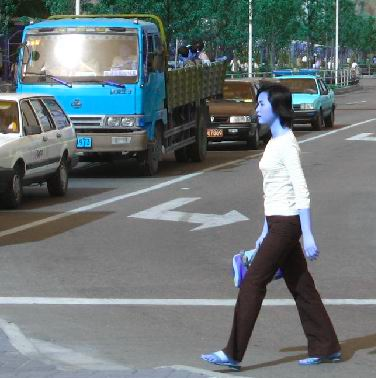

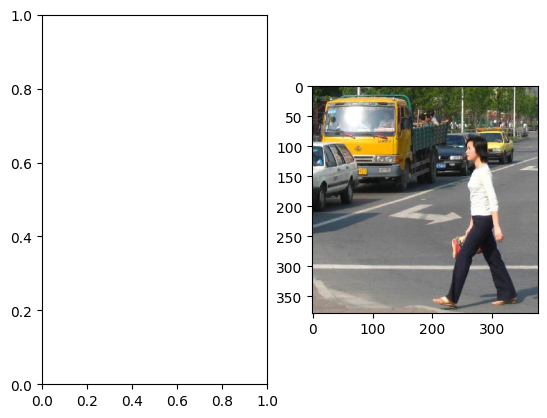

In [ ]:
import matplotlib.pyplot as plt
from torchvision.io import read_image

ig=Image.open(my_img)
plt.subplot(121)
cv2_imshow(np.array(ig))

plt.subplot(122)
plt.imshow(ig)

In [ ]:
tranform=T.ToTensor() #covert the PIL image library to tensor format
img=tranform(ig)


In [ ]:
#now, we will pass the image through our trained model
with torch.no_grad():
  prediction=model([img])
#the output here gives us the confidence probability for each object present in the image detected

In [ ]:
prediction
print("-----------------------------------------------------------")
print(type(prediction))
print("-----------------------------------------------------------")
print(prediction[0])
print("-----------------------------------------------------------")
print(type(prediction[0]))
print("-----------------------------------------------------------")
prediction[0].keys()
#o/p here in the dictionary are the image co-ordinates((x1,y1) (x2,y2))[boxes], imgaes-position[labels], confidence scorce of correctness w.r.t each object[scores]
boxes,labels,scores=prediction[0]['boxes'],prediction[0]['labels'],prediction[0]['scores']

-----------------------------------------------------------
<class 'list'>
-----------------------------------------------------------
{'boxes': tensor([[200.0108,  83.6796, 342.0796, 369.0021],
        [  0.4894,  92.0382,  76.5678, 203.9978],
        [272.4943,  74.7140, 334.0866, 131.3276],
        [204.2998,  79.5626, 263.8286, 151.2533],
        [110.4895,  40.7169, 135.2261,  70.5017],
        [ 10.1301,  12.4401, 202.3816, 178.8123],
        [177.0051,  45.3537, 189.7990,  66.1974],
        [350.3744,  60.7295, 358.8888,  81.1507],
        [187.9161,  42.4782, 211.5038,  63.8343],
        [370.1372,  56.5829, 376.0000,  76.1254],
        [183.3068,  46.2210, 196.4548,  63.6470],
        [ 15.5977,  10.1381, 189.9333, 176.9086],
        [179.0748,  43.8080, 205.0938,  65.4467],
        [208.4686,  77.6773, 316.5110, 148.9505],
        [371.4032,  56.2051, 376.0000,  65.2162],
        [312.7211,  57.9522, 321.1658,  69.0767],
        [232.1719, 248.2195, 252.9087, 288.7497],
     

In [ ]:
num=torch.argwhere(scores>0.9).shape[0]   #i.e number of objects having confindence-score interval greater than 0.9

In [ ]:
obj_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" ,"sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
igg=cv2.imread(my_img)   #reading the image of the cv2 model
#a reminder that the model that we use is pretrained
#now for each image having the confidence interval as specified we pass it through a loop w.r.t each object of the image
#now, our moto : enclose the object with boxes, name the object
for i in range(num):
  x1,y1,x2,y2=boxes[i].numpy().astype("int")    #record the coordinates of the image in numpy data of type int
  class_name=obj_names[labels.numpy()[i]-1]    #allot the object name w.r.t the labels list
  igg=cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)      #enclose the image with rectangle
  igg=cv2.putText(igg, class_name, (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0) ,1 , cv2.LINE_AA)   #put text w.r.t each image

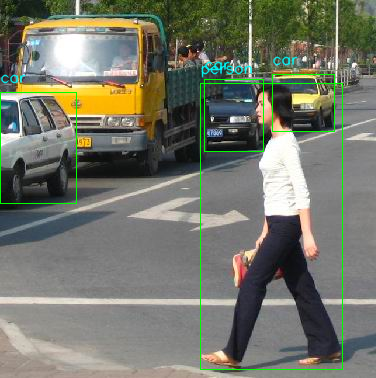

In [ ]:
cv2_imshow(igg)

In [ ]:
'''
import matplotlib.pyplot as plt
from torchvision.io import read_image
image = read_image("BloodImage_00000.jpg")
mask = read_image("BloodImage_00000.jpg")
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Image")
plt.imshow(image.permute(1, 2, 0))
plt.subplot(122)
plt.title("Mask")
plt.imshow(mask.permute(1, 2, 0))
'''

'\nimport matplotlib.pyplot as plt\nfrom torchvision.io import read_image\nimage = read_image("BloodImage_00000.jpg")\nmask = read_image("BloodImage_00000.jpg")\nplt.figure(figsize=(16, 8))\nplt.subplot(121)\nplt.title("Image")\nplt.imshow(image.permute(1, 2, 0))\nplt.subplot(122)\nplt.title("Mask")\nplt.imshow(mask.permute(1, 2, 0))\n'